## <font color = 'maroon'>Assignment 1, part 2 of 2</font>

Please **show your work** - i.e., show and explain your code/math, and write your reasoning.

1. **[1 mark]** Take the graduation rate dataset from the beginning of the notebook, and change the 'parental level of education' attribute so that it is ordered, just as we did earlier. Split the dataset into two groups: those with a level of at least high school, and those below. 
    1. Show a quantile-quantile plot of the 'parental income' for these two groups and report the results. What can you conclude about the relationship between these two attributes, just by looking at this plot?
    1. Now show a quantile-quantile plot, but of the 'years to graduate' variable, instead of 'parental income'. What can you infer?
       
2. **[1 mark]** Load the wine dataset (see the snippet at the bottom). Note that it contains observations of three classes. For each class, report the following univariate summaries of the 'alcohol' attribute: count, mean, min, max, quartiles and standard deviation.
    
2. **[1 mark]** Drop the 'target' attribute from the wine dataset and draw a 2D scatter plot using MDS. Use the code from section 1.10 in this notebook. Is the plot satisfactory? If yes, what steps did you take to improve the quality of the representation? If not, try to run preprocessing steps to improve the quality of the plot.
3. **[1 mark]** Based on a scatter matrix of the wine dataset, select three attributes that you think would be useful for building a classifier. Remember to justify your choice. Use the selected features to compute an MDS-based 2D embedding and show the resulting points in a scatter plot. Is the result comparable to the one obtained in the previous question? What are the advantages and/or disadvantages of this approach?

    **Tip**: In order to facilitate the inspection of the scatter matrix plot, you can save it to a file by running the following command, immediately after the plot command: `plt.savefig('output.pdf')`

1. **[1 mark]** Consider the `mystery.csv` dataset. Compute its first principal direction (or principal component) using PCA (that is, the leading eigenvector of the covariance matrix). Reshape this vector to dimension 60x79 and plot it as a heatmap. What do you see? What type of data do you think this dataset contains?

In [ ]:
import pandas as pd
data = pd.read_csv('graduation_rate.csv')
data.info()
data['parental level of education'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ACT composite score          1000 non-null   int64  
 1   SAT total score              1000 non-null   int64  
 2   parental level of education  1000 non-null   object 
 3   parental income              1000 non-null   int64  
 4   high school gpa              1000 non-null   float64
 5   college gpa                  1000 non-null   float64
 6   years to graduate            1000 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 54.8+ KB


array(["master's degree", 'some college', 'some high school',
       "bachelor's degree", "associate's degree", 'high school'],
      dtype=object)

[1 mark] Take the graduation rate dataset from the beginning of the notebook, and change the 'parental level of education' attribute so that it is ordered, just as we did earlier. Split the dataset into two groups: those with a level of at least high school, and those below.

Show a quantile-quantile plot of the 'parental income' for these two groups and report the results. What can you conclude about the relationship between these two attributes, just by looking at this plot?
Now show a quantile-quantile plot, but of the 'years to graduate' variable, instead of 'parental income'. What can you infer?

In [ ]:
education_order = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]

data['parental level of education'] = pd.Categorical(data['parental level of education'],
                                                   ordered=True,
                                                   categories=education_order)

display(data['parental level of education'])

0        master's degree
1           some college
2       some high school
3       some high school
4      bachelor's degree
             ...        
995          high school
996         some college
997          high school
998         some college
999     some high school
Name: parental level of education, Length: 1000, dtype: category
Categories (6, object): ['some high school' < 'high school' < 'some college' < 'associate's degree' <
                         'bachelor's degree' < 'master's degree']

In [ ]:
high_edu = data[data['parental level of education'] >= 'high school']
low_edu = data[data['parental level of education'] < 'high school']
print(high_edu.shape[0],low_edu.shape[0])

804 196


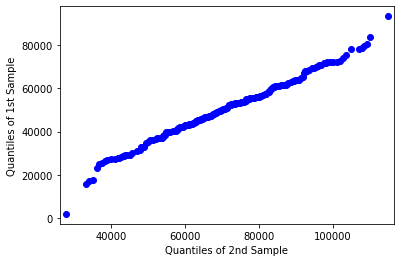

In [ ]:
 import statsmodels.api as sm
 import numpy as np
 import matplotlib.pyplot as plt
 from statsmodels.graphics.gofplots import qqplot_2samples
 x = high_edu['parental income']
 y = low_edu['parental income']
 pp_x = sm.ProbPlot(x)
 pp_y = sm.ProbPlot(y)
 qqplot_2samples(pp_y, pp_x)
 plt.show()

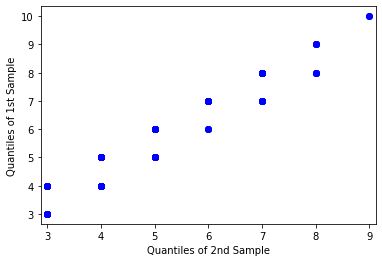

In [ ]:
 import statsmodels.api as sm
 import numpy as np
 import matplotlib.pyplot as plt
 from statsmodels.graphics.gofplots import qqplot_2samples
 x = high_edu['years to graduate']
 y = low_edu['years to graduate']
 pp_x = sm.ProbPlot(x)
 pp_y = sm.ProbPlot(y)
 qqplot_2samples(pp_y, pp_x)
 plt.show()

[1 mark] Load the wine dataset (see the snippet at the bottom). Note that it contains observations of three classes. For each class, report the following univariate summaries of the 'alcohol' attribute: count, mean, min, max, quartiles and standard deviation.

In [ ]:
from sklearn import datasets
import numpy as np
import pandas as pd

data=datasets.load_wine()
df = pd.DataFrame(data= np.c_[data['data'], data['target']], columns= data['feature_names'] + ['target'])

In [ ]:
df.info()
df['target'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

array([0., 1., 2.])

In [ ]:
df[df['target']==0]['alcohol'].describe()

count    59.000000
mean     13.744746
std       0.462125
min      12.850000
25%      13.400000
50%      13.750000
75%      14.100000
max      14.830000
Name: alcohol, dtype: float64

In [ ]:
df[df['target']==1]['alcohol'].describe()

count    71.000000
mean     12.278732
std       0.537964
min      11.030000
25%      11.915000
50%      12.290000
75%      12.515000
max      13.860000
Name: alcohol, dtype: float64

In [ ]:
df[df['target']==2]['alcohol'].describe()

count    48.000000
mean     13.153750
std       0.530241
min      12.200000
25%      12.805000
50%      13.165000
75%      13.505000
max      14.340000
Name: alcohol, dtype: float64

[1 mark] Drop the 'target' attribute from the wine dataset and draw a 2D scatter plot using MDS. Use the code from section 1.10 in this notebook. Is the plot satisfactory? If yes, what steps did you take to improve the quality of the representation? If not, try to run preprocessing steps to improve the quality of the plot.

In [ ]:
df.isna().sum()
df.duplicated().sum()

0

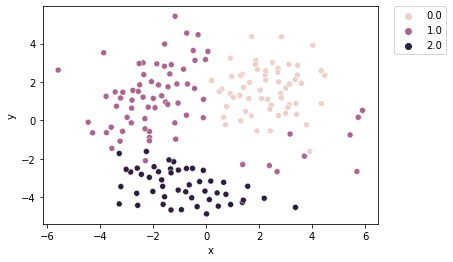

In [ ]:
from sklearn.manifold import MDS
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X_data = df.drop(['target'],axis=1)   

scalar = StandardScaler().fit(X_data)
X_data_standard = scalar.transform(X_data)

embedding = MDS(n_components=2)
Xp = embedding.fit_transform(X_data_standard)
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1]})
sns.scatterplot(x='x', y='y', data=df_projection , hue=df['target'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


[1 mark] Based on a scatter matrix of the wine dataset, select three attributes that you think would be useful for building a classifier. Remember to justify your choice. Use the selected features to compute an MDS-based 2D embedding and show the resulting points in a scatter plot. Is the result comparable to the one obtained in the previous question? What are the advantages and/or disadvantages of this approach?

Tip: In order to facilitate the inspection of the scatter matrix plot, you can save it to a file by running the following command, immediately after the plot command: plt.savefig('output.pdf')

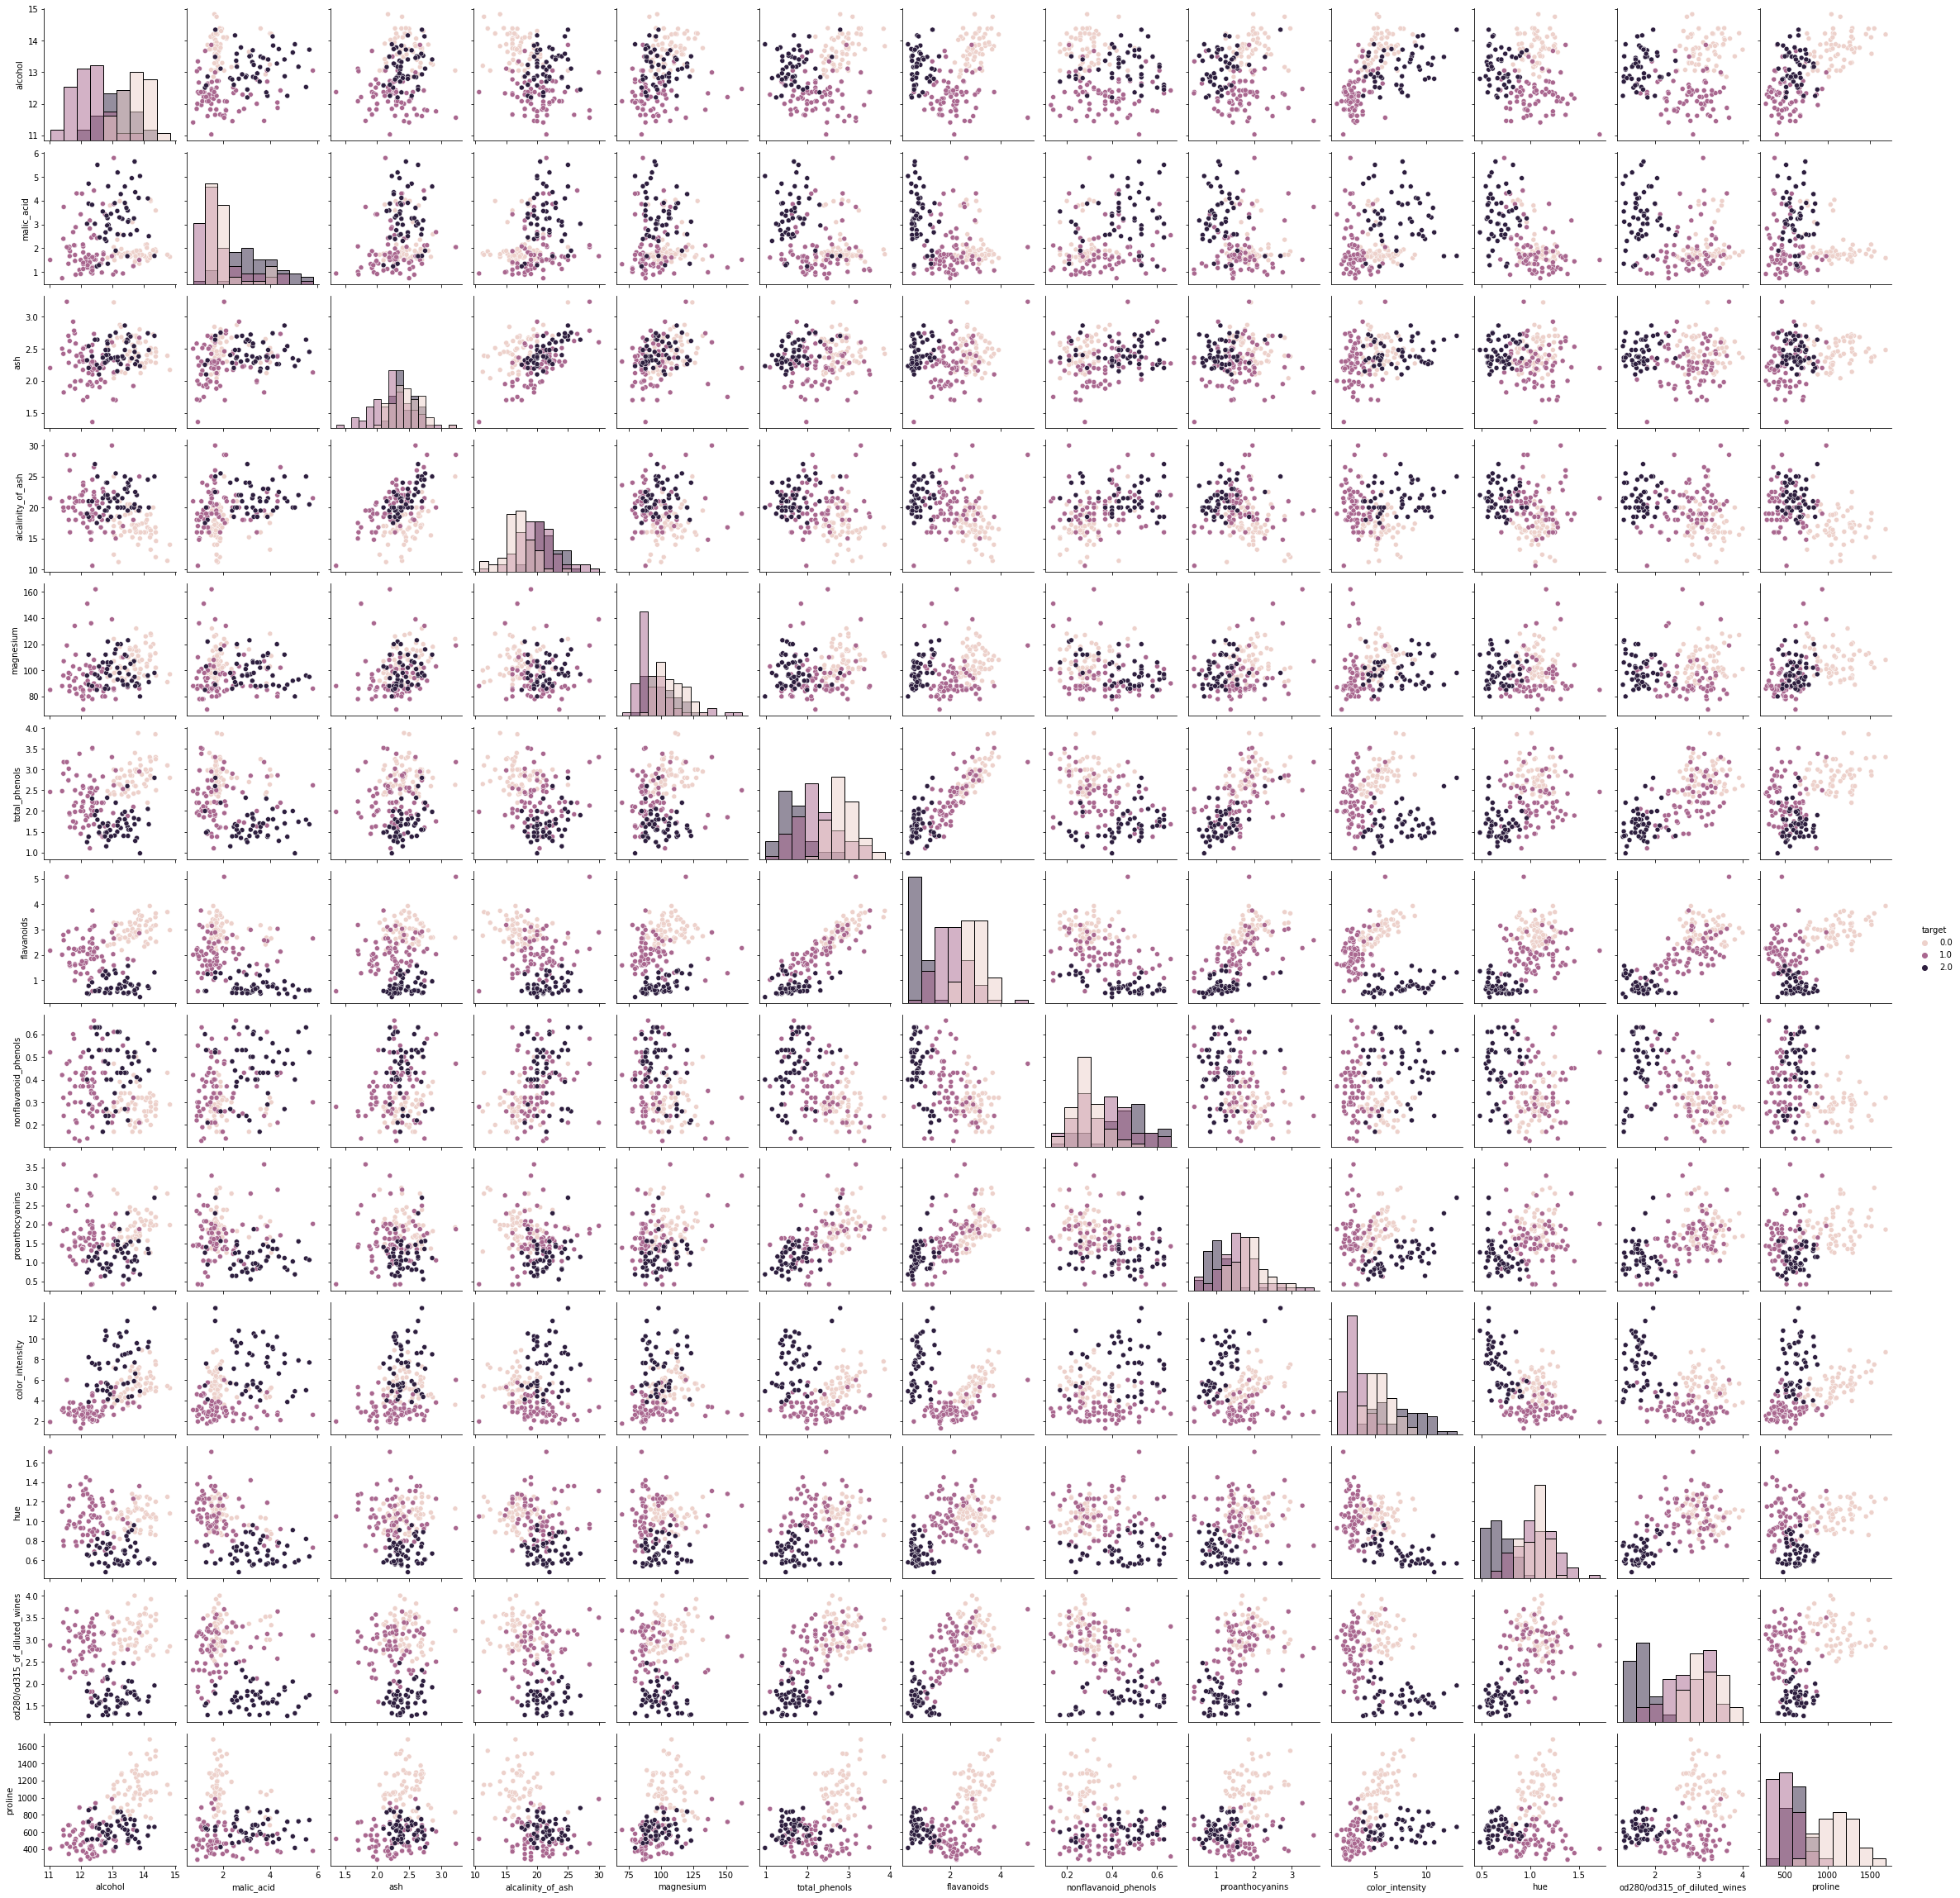

In [ ]:
import seaborn as sns
sns.pairplot(df, hue='target', diag_kind='hist')
plt.show()
plt.savefig('output.pdf')

In [ ]:
df.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')

In [ ]:
import pandas as pd
df_sample = df[['alcohol', 'od280/od315_of_diluted_wines', 'proline', 'target']]
df_sample.shape

(178, 4)

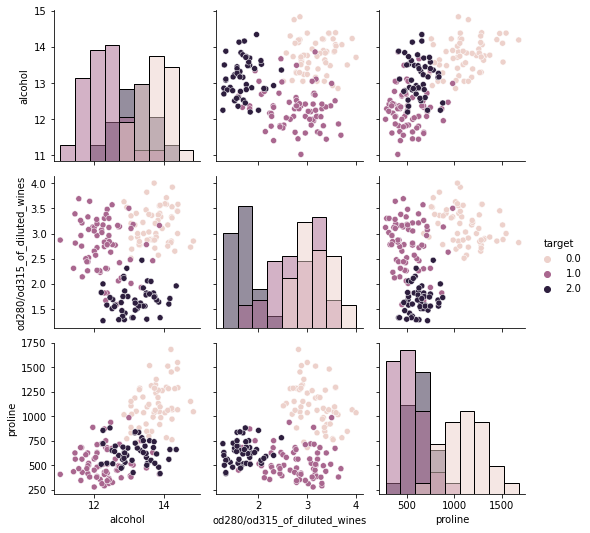

In [ ]:
import seaborn as sns
sns.pairplot(df_sample, hue='target', diag_kind='hist')
plt.show()

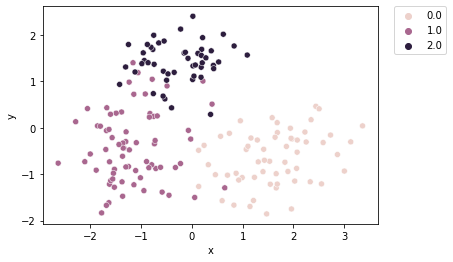

In [ ]:
from sklearn.manifold import MDS
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

X_data = df_sample.drop(['target'],axis=1)   

scalar = StandardScaler().fit(X_data)
X_data_standard = scalar.transform(X_data)

embedding = MDS(n_components=2)
Xp = embedding.fit_transform(X_data_standard)
df_projection = pd.DataFrame({'x': Xp[:, 0], 'y': Xp[:, 1]})
sns.scatterplot(x='x', y='y', data=df_projection , hue=df['target'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


[1 mark] Consider the mystery.csv dataset. Compute its first principal direction (or principal component) using PCA (that is, the leading eigenvector of the covariance matrix). Reshape this vector to dimension 60x79 and plot it as a heatmap. What do you see? What type of data do you think this dataset contains?

In [ ]:
import pandas as pd
data = pd.read_csv('mystery.csv', delimiter=' ', quotechar='"')

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
160    1.0
161    1.0
162    1.0
163    1.0
164    1.0
Length: 165, dtype: float64

In [ ]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=1)
principalComponents = pca2.fit_transform(data.T)

principalDf = pd.DataFrame(data = principalComponents)
print(principalDf)
principalDf.shape
new_data = principalDf.values.reshape(60,79)


             0
0    -2.364820
1    -2.397276
2    -2.399437
3    -2.403904
4    -2.417120
...        ...
4735 -0.091595
4736 -0.136720
4737 -0.205784
4738 -0.256109
4739 -0.216698

[4740 rows x 1 columns]


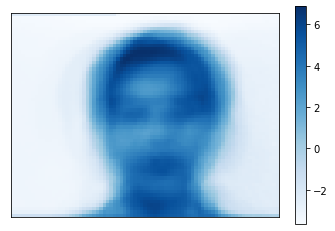

In [ ]:
# Interpolation: point (x, y) is colored according to the value z of the nearest point in the dataset
plt.imshow(new_data, cmap='Blues', aspect='equal', interpolation='nearest')
plt.colorbar()

# xticks and yticks would show Z matrix indices
plt.xticks([])
plt.yticks([])

plt.show()